# This notebook demonstrates simple visualizations of the output format data

In [4]:
%gui qt5

In [3]:
%matplotlib inline

In [25]:
import sys
import os
import skimage
import starspace
import napari
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [4]:
# !{sys.executable} -m pip install -e ..

Obtaining file:///Users/ajc/projects/chanzuckerberg/spatial-warehouse
    100% |████████████████████████████████| 37.4MB 846kB/s eta 0:00:01    74% |████████████████████████        | 28.0MB 45.6MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 13.6MB/s ta 0:00:01


  Found existing installation: PyQt5-sip 4.19.15
    Uninstalling PyQt5-sip-4.19.15:
      Successfully uninstalled PyQt5-sip-4.19.15
  Found existing installation: PyQt5 5.12.1
    Uninstalling PyQt5-5.12.1:
      Successfully uninstalled PyQt5-5.12.1
  Found existing installation: starspace 0.0.1
    Uninstalling starspace-0.0.1:
      Successfully uninstalled starspace-0.0.1
  Running setup.py develop for starspace


## Load and view cancer on top of H&E image

In [ ]:
matrix_path = '../starspace/conversion_examples/spatial-transcriptomics-stahl-2016-science-prostate-cancer.matrix.zarr'
image_path = "~/google_drive/czi/spatial-approaches/spatial-transcriptomics/10.1126/science.aaf2403/HE_layer1_BC.jpg"

matrix = starspace.Matrix.load_zarr(matrix_path)
img = skimage.io.imread(os.path.expanduser(image_path))

In [21]:
coordinates = np.stack([matrix.x_region, matrix.y_region], axis=-1)

viewer = napari.Viewer()
viewer.add_image(np.transpose(img, (1, 0, 2)))
viewer.add_points(coordinates, size=150, face_color='white', edge_color='black')

/usr/local/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<Points layer 'Points' at 0x18b106a20>

## Visualize in cellxgene

In [13]:
adata = matrix.to_anndata()

In [14]:
adata.write_h5ad('spatial_transcriptomics_cancer.h5ad')

... storing 'biological_annotation' as categorical
... storing 'physical_annotation' as categorical
... storing 'channel' as categorical


## Load and view olfactory bulb on top of H&E image

In [22]:
matrix_path = '../starspace/conversion_examples/spatial-transcriptomics-stahl-2016-science-olfactory-bulb.matrix.zarr'
image_path = "~/google_drive/czi/spatial-approaches/spatial-transcriptomics/10.1126/science.aaf2403/HE_Rep1.jpg"

matrix = starspace.Matrix.load_zarr(matrix_path)
img = skimage.io.imread(os.path.expanduser(image_path))

/usr/local/lib/python3.7/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (92080232 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [23]:
coordinates = np.stack([matrix.x_region, matrix.y_region], axis=-1)

viewer = napari.Viewer()
viewer.add_image(np.transpose(img, (1, 0, 2)))
viewer.add_points(coordinates, size=150, face_color='white', edge_color='black')

/usr/local/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<Points layer 'Points' at 0x1524af4e0>

The data can also be plotted in the python notebook, although it is slower and lacks zoom. 

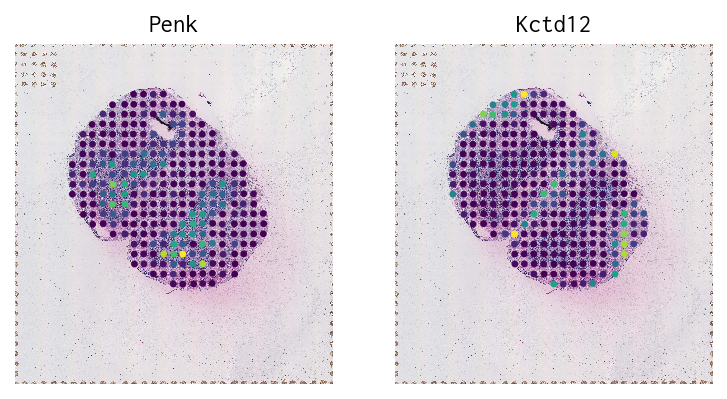

In [47]:
f, axes = plt.subplots(ncols=2, dpi=150)
for ax, gene_name in zip(axes, ("Penk", "Kctd12")):
    gene = np.ravel((matrix.where(matrix.gene_name == gene_name, drop=True)))
    ax.imshow(img)
    ax.set_title(gene_name)
    ax.scatter(coordinates[:, 0], coordinates[:, 1], s=5, c=gene)
    ax.set_axis_off()